In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### First I'll import my weather data CSV and save it as a dataframe:

In [2]:
weather = pd.read_csv('../data/weather.csv')

In [30]:
weather.ResultDir[:100]

0     27
1      4
2      7
3      8
4      7
5     11
6     18
7     11
8      9
9     17
10     3
11     3
12    14
13    21
14    27
15    36
16     3
17    25
18    24
19     4
20    11
21    18
22    19
23    21
24     5
25    17
26    26
27    10
28    18
29    19
      ..
70    23
71    30
72    29
73     1
74    26
75    29
76    24
77    23
78    24
79     1
80     3
81     3
82    16
83     9
84    20
85    25
86    22
87     3
88     3
89     5
90     6
91     4
92     9
93    26
94     3
95     8
96    21
97    10
98    25
99     3
Name: ResultDir, Length: 100, dtype: int64

#### Then I'll look at the unique dates in my 'date' column:

#### Now I want to do the same two things for my training data:

In [3]:
train = pd.read_csv('../../input/train.csv')

#### I see that I have far fewer dates for the training data than I do for weather data. I'm going to go ahead and merge the two dataframes on the "Date" column. This will create a new dataframe that only includes all the weather data for the dates from my training data.

In [4]:
combine = pd.merge(weather, train, on='Date')

#### I'll go ahead and save this as a csv to use in my next notebook:

In [5]:
combine.to_csv('../data/combine.csv', index=False)

#### I'll double check and make sure that these dates are the same:

In [6]:
list(combine.Date.unique())==list(train.Date.unique())

True

In [7]:
test = pd.read_csv('../../input/test.csv')

In [8]:
test.shape

(116293, 11)

In [9]:
combine.drop(['Station', 'Street', 'Block', 'Address','AddressAccuracy'], axis=1, inplace=True)

In [10]:
combine.shape

(10506, 21)

In [11]:
combine['Date'] = pd.to_datetime(combine['Date'])

In [12]:
combine.dtypes

Date                      datetime64[ns]
Tmax                               int64
Tmin                               int64
Tavg                             float64
DewPoint                           int64
WetBulb                            int64
Heat                               int64
Cool                               int64
PrecipTotal                      float64
StnPressure                      float64
SeaLevel                         float64
ResultSpeed                      float64
ResultDir                          int64
AvgSpeed                         float64
Species                           object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object

In [13]:
#combine.groupby(['Date'])[['NumMosquitos']].sum()

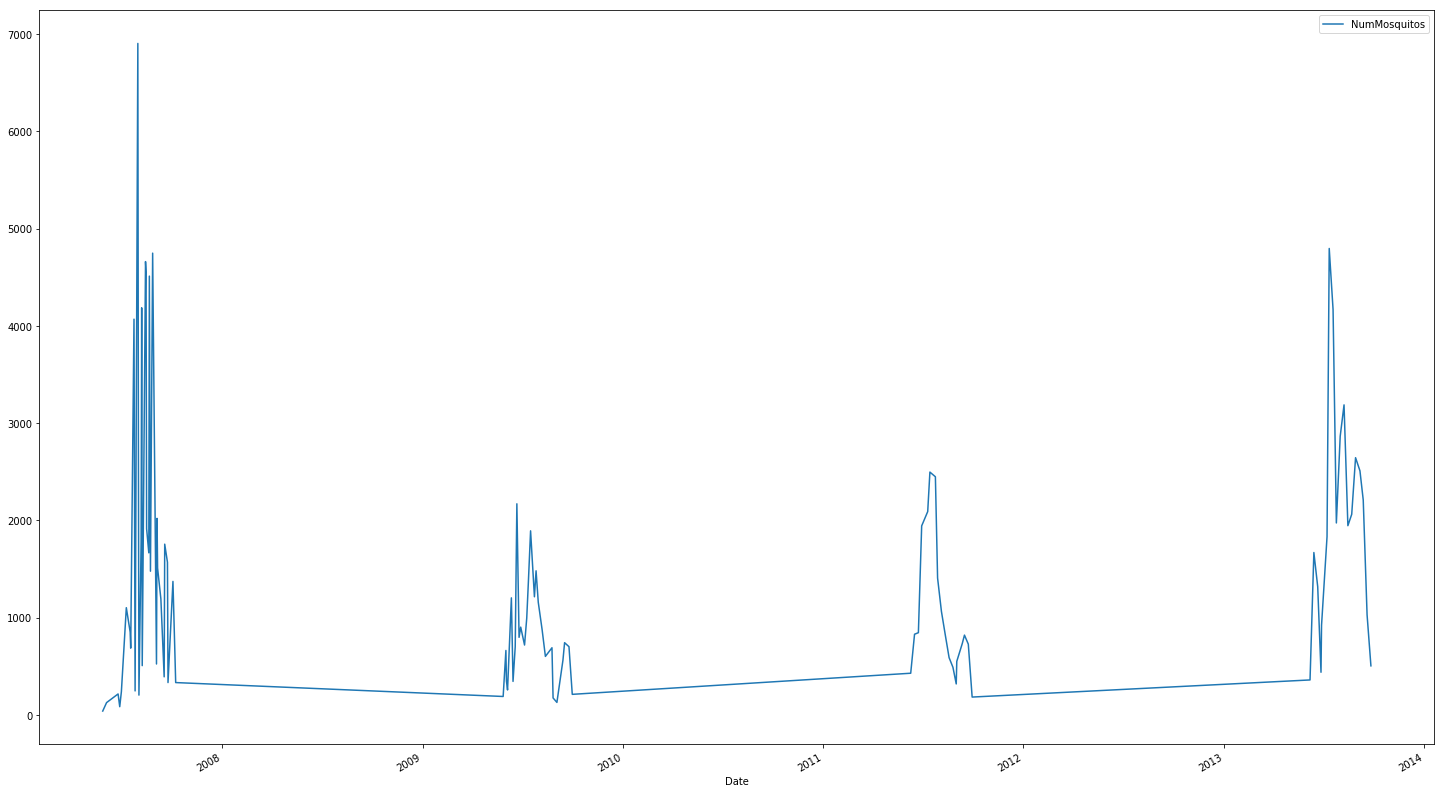

In [14]:
combine.groupby(['Date'])[['NumMosquitos']].sum().plot(figsize=(25,15))

In [15]:
combine.NumMosquitos.unique()

array([ 1,  4,  2,  3,  5,  9,  7, 10,  8,  6, 19, 20, 25, 16, 11, 12, 28,
       18, 50, 35, 14, 22, 21, 37, 27, 13, 39, 29, 15, 17, 34, 26, 32, 47,
       44, 23, 46, 48, 42, 33, 45, 24, 41, 38, 40, 36, 43, 49, 30, 31])

In [16]:
combine.dtypes

Date                      datetime64[ns]
Tmax                               int64
Tmin                               int64
Tavg                             float64
DewPoint                           int64
WetBulb                            int64
Heat                               int64
Cool                               int64
PrecipTotal                      float64
StnPressure                      float64
SeaLevel                         float64
ResultSpeed                      float64
ResultDir                          int64
AvgSpeed                         float64
Species                           object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object

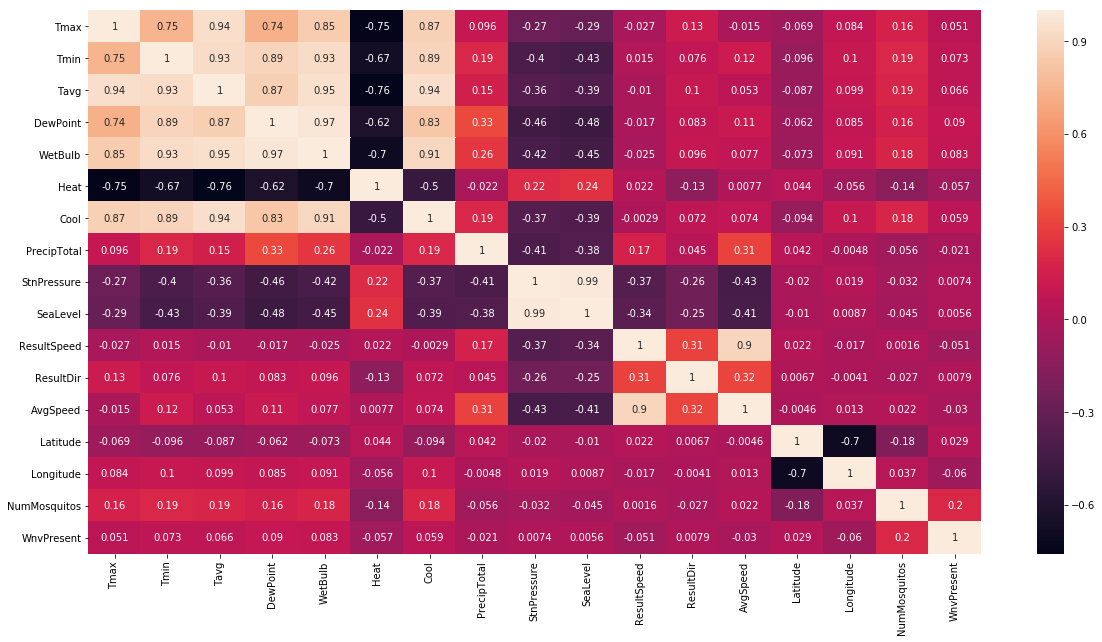

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(combine.corr(), annot=True)

In [18]:
combine.set_index('Date', inplace=True)

Visualizing weather features independently:

In [19]:
# test = combine['2007'].groupby(['Date']).sum()[['NumMosquitos']].rolling(7).mean()
# test1 = test[datetime(2007, 7, 11):]

In [21]:
wnv_07 = combine['2007'].groupby(['Date'])[['NumMosquitos']].sum()
wnv_09 = combine['2009'].groupby(['Date'])[['NumMosquitos']].sum()
wnv_11 = combine['2011'].groupby(['Date'])[['NumMosquitos']].sum()
wnv_13 = combine['2013'].groupby(['Date'])[['NumMosquitos']].sum()

In [24]:
combine['2007'].groupby(['Date'])[['ResultDir', "NumMosquitos"]].mean()

,ResultDir,NumMosquitos
Date,,
2007-05-29,18.0,1.600000
2007-06-05,5.0,2.116667
2007-06-26,22.0,3.085714
2007-06-29,2.0,1.847826
2007-07-02,14.0,3.243243
2007-07-11,30.0,7.256579
2007-07-18,24.0,6.612403
2007-07-19,1.0,15.266667
2007-07-25,25.0,44.228261


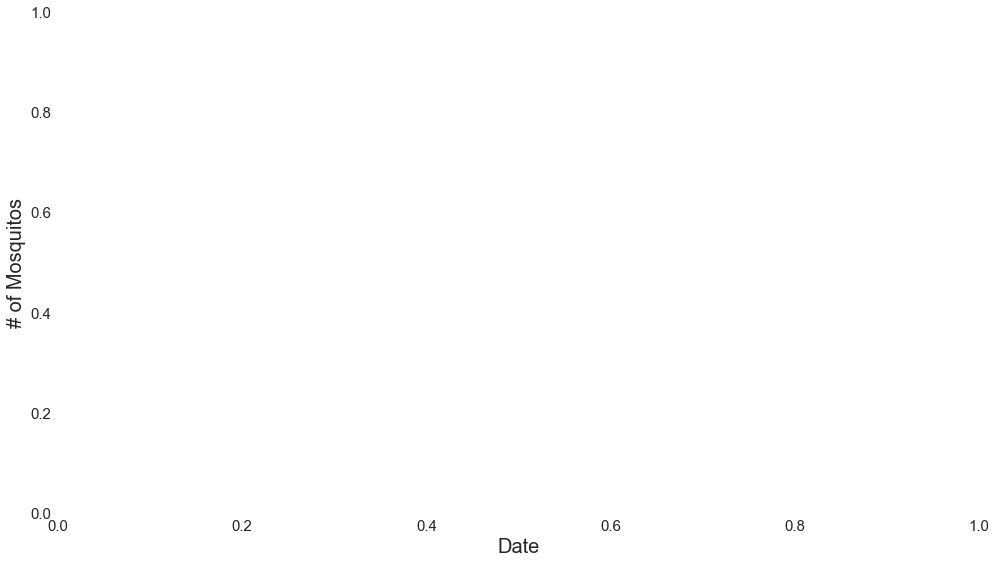

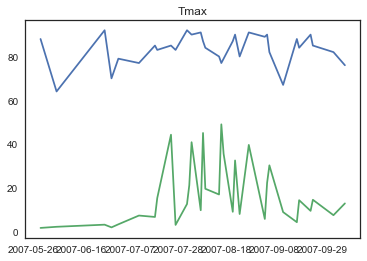

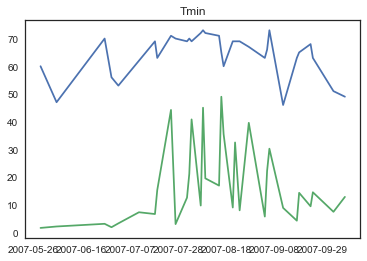

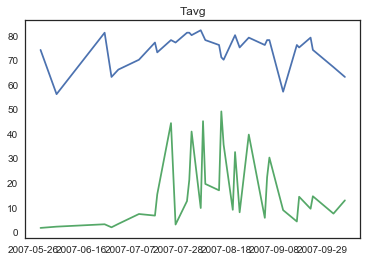

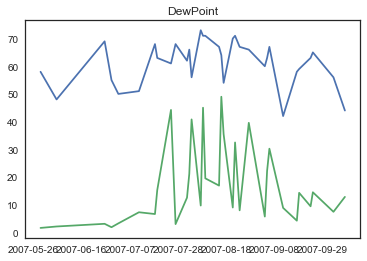

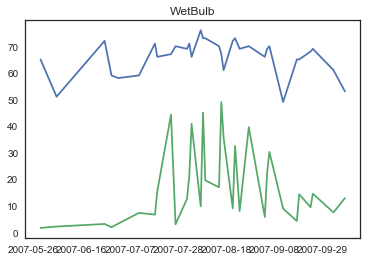

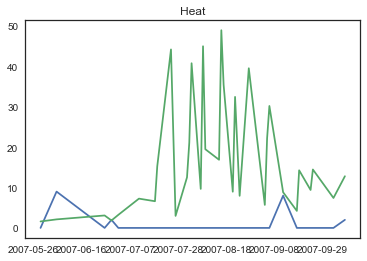

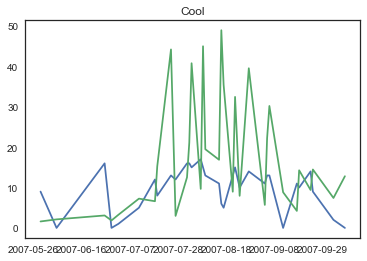

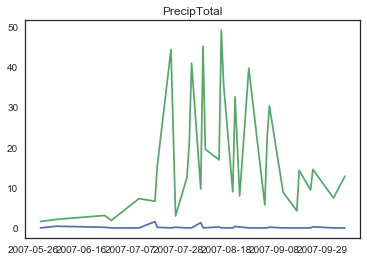

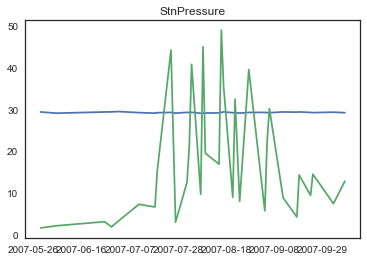

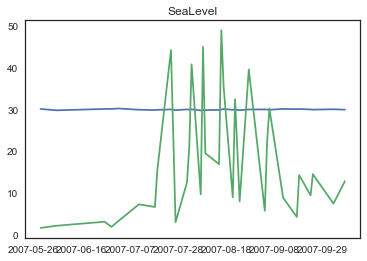

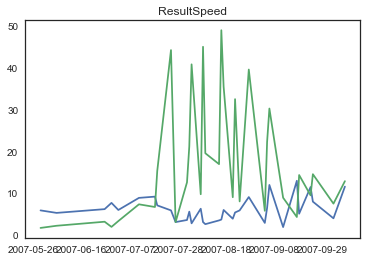

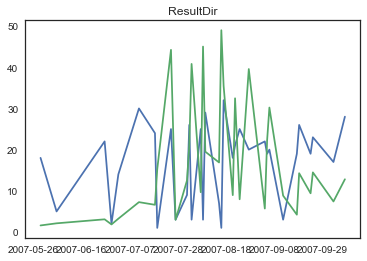

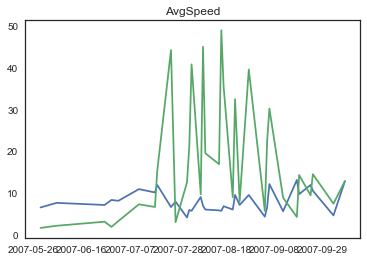

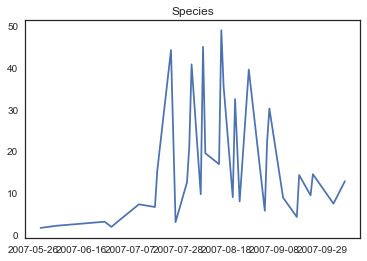

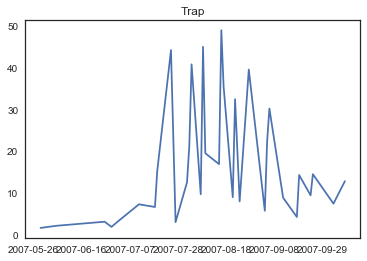

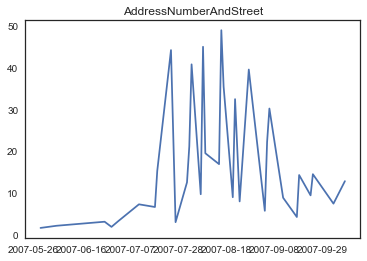

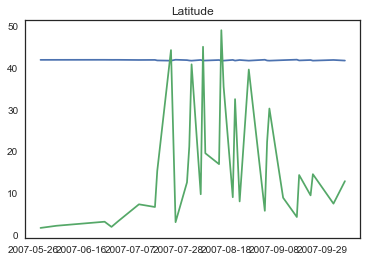

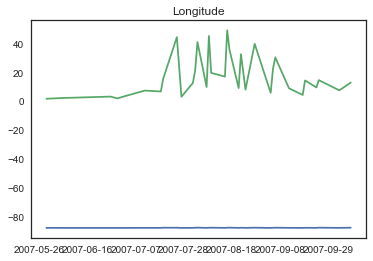

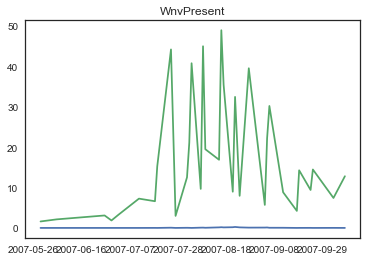

In [36]:
sns.set(style='white')
fig, ax = plt.figure(figsize=(14,8)), plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('# of Mosquitos', fontsize=20)
plt.xlabel('Date', fontsize=20)
#plt.title("Wind Direction and Mosquito Population", fontsize=30)
plt.tight_layout()
#plt.plot(wnv_07, c="darkorange", label='Mosquitoes', lw=3, alpha=.7)
#plt.plot(combine['2007']['DewPoint']*25, c='teal', lw=3, alpha=.7)
#plt.plot(combine['2007']['Tavg']*25, c="fuchsia", lw=3, alpha=.7)
#(combine['2007'].groupby(['Date'])[['ResultDir']].sum(), c="teal", label='ResultSpeed')
for column in combine.columns:
    try:
        if column != "NumMosquitos":
            plt.figure()
            plt.title(column)
            plt.plot(combine['2007'].groupby(['Date'])[[column, "NumMosquitos"]].mean())
    except:
        pass
#plt.savefig("../assets/heat_humid_mosq.png")

#### Literally just making a model using weather data:

In [260]:
X= combine.drop(['NumMosquitos', 'WnvPresent', 'Species', 'Trap', 'AddressNumberAndStreet', 'Longitude',
                'Latitude'], axis=1)

In [261]:
y = combine.WnvPresent

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [263]:
mnb = MultinomialNB()

In [264]:
params=  {'alpha' : [.3, .5, .7, .9]}

In [265]:
gs = GridSearchCV(mnb, param_grid=params)

In [266]:
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)
print(gs.score(X_train, y_train))

{'alpha': 0.7}
0.9455514659220713
0.9475821804797563


In [267]:
gs.score(X_test, y_test)

0.9474685953559193

In [269]:
combine2 = pd.merge(weather, test, on='Date')

#### Again, I'll save this out as a csv:

In [270]:
combine2.to_csv('../data/combine2.csv', index=False)

In [271]:
combine2.dtypes

Date                       object
Station                     int64
Tmax                        int64
Tmin                        int64
Tavg                      float64
DewPoint                    int64
WetBulb                     int64
Heat                        int64
Cool                        int64
PrecipTotal               float64
StnPressure               float64
SeaLevel                  float64
ResultSpeed               float64
ResultDir                   int64
AvgSpeed                  float64
Id                          int64
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object

In [272]:
X_2= combine2.drop(['Date','Species', 'Trap', 'AddressNumberAndStreet', 'Longitude',
                'Latitude'], axis=1)

In [273]:
X.head()

,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,
2007-05-29,88,60,74.0,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5
2007-05-29,88,60,74.0,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5
2007-05-29,88,60,74.0,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5
2007-05-29,88,60,74.0,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5
2007-05-29,88,60,74.0,58,65,0,9,0.0,29.39,30.11,5.8,18,6.5


In [274]:
print(X.shape)
print(X_2.shape)

(10506, 13)
(116293, 19)


In [275]:
test_drop = list(set(X_2.columns) - set(X.columns))

In [276]:
X_2.drop(test_drop,axis=1,inplace=True)

In [277]:
X_2.columns

Index(['Tmax', 'Tmin', 'Tavg', 'DewPoint', 'WetBulb', 'Heat', 'Cool',
       'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir',
       'AvgSpeed'],
      dtype='object')

In [278]:
predictions = gs.predict_proba(X_2)[:,1]

In [279]:
sample = pd.read_csv('../../input/sampleSubmission.csv')

In [280]:
sample.WnvPresent = predictions

In [281]:
sample.to_csv('../data/lame_submit.csv', index=False)

In [282]:
sample.head()

,Id,WnvPresent
0,1,0.049652
1,2,0.049652
2,3,0.049652
3,4,0.049652
4,5,0.049652


In [283]:
lr =LogisticRegression(random_state=42)

In [284]:
params2 = {
    "penalty" : ['l1', 'l2'],
    "C" : [0.1, 0.3, 0.5]
}

In [285]:
gs2 = GridSearchCV(lr, param_grid = params2)

In [286]:
gs2.fit(X_train, y_train)
print(gs2.best_params_)
print(gs2.best_score_)
print(gs2.score(X_train, y_train))
print(gs2.score(X_test, y_test))

{'C': 0.1, 'penalty': 'l1'}
0.9475821804797563
0.9475821804797563
0.9474685953559193


In [287]:
predictions2 = gs2.predict_proba(X_2)[:,1]

In [288]:
sample2 = pd.read_csv('../../input/sampleSubmission.csv')

In [289]:
sample2.WnvPresent = predictions2

In [290]:
sample2.to_csv('../data/lame_logreg.csv', index=False)

In [291]:
coefs2 = gs2.best_estimator_.coef_[0]

In [292]:
coefs_df = pd.DataFrame({'Feature':X_2.columns,'Weight':coefs2})

#### Looking at feature importance:

In [293]:
coefs_sorted = coefs_df.sort_values('Weight',ascending=True)

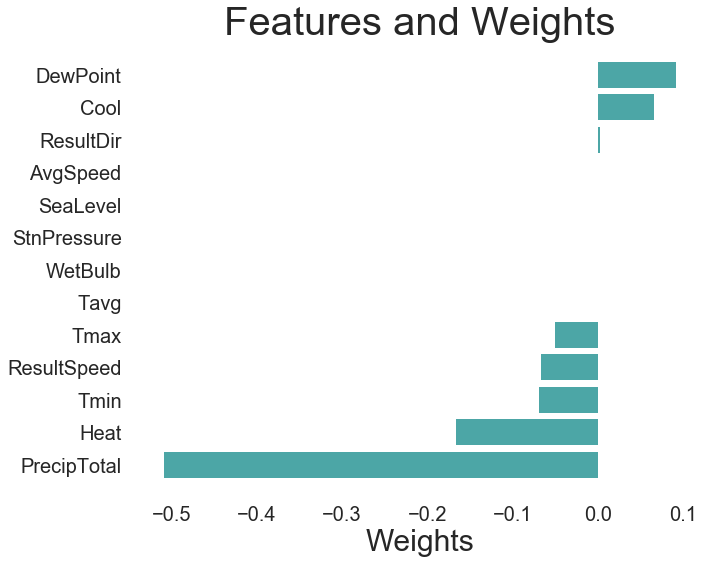

In [294]:
X = coefs_sorted.Feature
y = coefs_sorted.Weight

sns.set(style='white')
fig, ax = plt.figure(figsize=(10,8)), plt.gca()
plt.barh(X, y, color='teal', alpha=.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['left'].set_position(('data',-.55))
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Weights', fontsize=30)
plt.title("Features and Weights", fontsize=40)
plt.tight_layout()
plt.savefig("../assets/features_weights.png")

#### Pickling models: 

In [116]:
import pickle

In [117]:
with open('../data/gs_nb.pkl', 'wb+') as f:
    pickle.dump(gs, f)

In [119]:
with open('../data/gs_logreg.pkl', 'wb+') as f:
    pickle.dump(gs2, f)